In [27]:
import seekpath
import spglib
import numpy as np
import sys
from get_wave import get_wave_mean
class feature_extraction(object):
    """docstring for feature_extraction
    Extract information such as lattice constants, element types, number of atoms and high symmetry points：
    lattice         lattice parameters
    atmtyp          element type
    elenu           number of elements
    hkpts           kpints
    numbers         elem number
    positions       position of atomic real space
    directions      vector with kpoint, see for detailsreal_direction()
    overlap         superimposed wave function value
    hkpts_ins       high symmetry point
    hkpts_real      real space coordinates
    """

    def __init__(self, filename):
        self.filename   = filename
        self.atmtyp     = []
        self.elenu      = []
        self.structure  = []
        self.lattice    = []
        self.positions  = []
        self.numbers    = []
        self.hkpts      = []
        self.directions = [] 
        self.overlap    = []
        self.hkpts_ins  = []
        self.hkpts_real = []
        self.overlap_avg =[]

    # the Electronic configuration of elements
        self.__symbol_map = {
   "H":[1,1],
   "He":[2,2],
   "Li":[3,2,1],
   "Be":[4,2,2],
   "B":[5,2,2,1],
   "C":[6,2,2,2],
   "N":[7,2,2,3],
   "O":[8,2,2,4],
   "F":[9,2,2,5],
   "Ne":[10,2,2,6],
   "Na":[11,2,2,6,1],
   "Mg":[12,2,2,6,2],
   "Al":[13,2,2,6,2,1],
   "Si":[14,2,2,6,2,2],
   "P":[15,2,2,6,2,3],
   "S":[16,2,2,6,2,4],
   "Cl":[17,2,2,6,2,5],
   "Ar":[18,2,2,6,2,6],
   "K":[19,2,2,6,2,6,1],
   "Ca":[20,2,2,6,2,6,2],
   "Sc":[21,2,2,6,2,6,1,2],
   "Ti":[22,2,2,6,2,6,2,2],
   "V":[23,2,2,6,2,6,3,2],
   "Cr":[24,2,2,6,2,6,5,1],
   "Mn":[25,2,2,6,2,6,5,2],
   "Fe":[26,2,2,6,2,6,6,2],
   "Co":[27,2,2,6,2,6,7,2],
   "Ni":[28,2,2,6,2,6,8,2],
   "Cu":[29,2,2,6,2,6,10,1],
   "Zn":[30,2,2,6,2,6,10,2],
   "Ga":[31,2,2,6,2,6,10,2,1],
   "Ge":[32,2,2,6,2,6,10,2,2],
   "As":[33,2,2,6,2,6,10,2,3],
   "Se":[34,2,2,6,2,6,10,2,4],
   "Br":[35,2,2,6,2,6,10,2,5],
   "Kr":[36,2,2,6,2,6,10,2,6],
   "Rb":[37,2,2,6,2,6,10,2,6,1],
   "Sr":[38,2,2,6,2,6,10,2,6,2],
   "Y":[39,2,2,6,2,6,10,2,6,1,2],
   "Zr":[40,2,2,6,2,6,10,2,6,2,2],
   "Nb":[41,2,2,6,2,6,10,2,6,4,1],
   "Mo":[42,2,2,6,2,6,10,2,6,5,1],
   "Tc":[43,2,2,6,2,6,10,2,6,5,2],
   "Ru":[44,2,2,6,2,6,10,2,6,7,1],
   "Rh":[45,2,2,6,2,6,10,2,6,8,1],
   "Pd":[46,2,2,6,2,6,10,2,6,10],
   "Ag":[47,2,2,6,2,6,10,2,6,10,1],
   "Cd":[48,2,2,6,2,6,10,2,6,10,2],
   "In":[49,2,2,6,2,6,10,2,6,10,2,1],
   "Sn":[50,2,2,6,2,6,10,2,6,10,2,2],
   "Sb":[51,2,2,6,2,6,10,2,6,10,2,3],
   "Te":[52,2,2,6,2,6,10,2,6,10,2,4],
   "I":[53,2,2,6,2,6,10,2,6,10,2,5],
   "Xe":[54,2,2,6,2,6,10,2,6,10,2,6],
   "Cs":[55,2,2,6,2,6,10,2,6,10,2,6,1],
   "Ba":[56,2,2,6,2,6,10,2,6,10,2,6,2],
   "La":[57,2,2,6,2,6,10,2,6,10,2,6,1,2],
   "Ce":[58,2,2,6,2,6,10,2,6,10,2,6,1,1,2],
   "Pr":[59,2,2,6,2,6,10,2,6,10,2,6,3,2],
   "Nd":[60,2,2,6,2,6,10,2,6,10,2,6,4,2],
   "Pm":[61,2,2,6,2,6,10,2,6,10,2,6,5,2],
   "Sm":[62,2,2,6,2,6,10,2,6,10,2,6,6,2],
   "Eu":[63,2,2,6,2,6,10,2,6,10,2,6,7,2],
   "Gd":[64,2,2,6,2,6,10,2,6,10,2,6,7,1,2],
   "Tb":[65,2,2,6,2,6,10,2,6,10,2,6,9,2],
   "Dy":[66,2,2,6,2,6,10,2,6,10,2,6,10,2],
   "Ho":[67,2,2,6,2,6,10,2,6,10,2,6,11,2],
   "Er":[68,2,2,6,2,6,10,2,6,10,2,6.12,2],
   "Tm":[69,2,2,6,2,6,10,2,6,10,2,6,13,2],
   "Yb":[70,2,2,6,2,6,10,2,6,10,2,6,14,2],
   "Lu":[71,2,2,6,2,6,10,2,6,10,2,6,14,1,2],
   "Hf":[72,2,2,6,2,6,10,2,6,10,2,6,14,2,2],
   "Ta":[73,2,2,6,2,6,10,2,6,10,2,6,14,3,2],
   "W":[74,2,2,6,2,6,10,2,6,10,2,6,14,4,2],
   "Re":[75,2,2,6,2,6,10,2,6,10,2,6,14,5,2],
   "Os":[76,2,2,6,2,6,10,2,6,10,2,6,14,6,2],
   "Ir":[77,2,2,6,2,6,10,2,6,10,2,6,14,7,2],
   "Pt":[78,2,2,6,2,6,10,2,6,10,2,6,14,9,2],
   "Au":[79,2,2,6,2,6,10,2,6,10,2,6,14,10,1],
   "Hg":[80,2,2,6,2,6,10,2,6,10,2,6,14,10,2],
   "Tl":[81,2,2,6,2,6,10,2,6,10,2,6,14,10,2,1],
   "Pb":[82,2,2,6,2,6,10,2,6,10,2,6,14,10,2,2],
   "Bi":[83,2,2,6,2,6,10,2,6,10,2,6,14,10,2,3],
   "Po":[84,2,2,6,2,6,10,2,6,10,2,6,14,10,2,4],
   "At":[85,2,2,6,2,6,10,2,6,10,2,6,14,10,2,5],
   "Rn":[86,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6],
   "Fr":[87,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,1],
   "Ra":[88,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,2],
   "Ac":[89,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,1,2],
   "Th":[90,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,2,2],
   "Pa":[91,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,2,1,2],
   "U":[92,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,3,1,2],
   "Np":[93,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,4,1,2],
   "Pu":[94,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,6,2],
   "Am":[95,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,7,2],
   "Cm":[96,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,7,1,2],
   "Bk":[97,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,9,2],
   "Cf":[98,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,10,2],
   "Es":[99,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6.11,2],
   "Fm":[100,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,12,2],
   "Md":[101,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,13,2],
   "No":[102,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,2],
   "Lr":[103,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,2,1],
   "Rf":[104,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,2,2],
   "Db":[105,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,3,2],
   "Sg":[106,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,4,2],
   "Bh":[107,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,5,2],
   "Hs":[108,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,6,2],
   "Mt":[109,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,7,2],
   "Ds":[110,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,8,2],
   "Rg":[111,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,9,2],
   "Cn":[112,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,10,2],
   "Nh":[113,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,10,2,1],
   "Fl":[114,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,10,2,2],
   "Mc":[115,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,10,2,3],
   "Lv":[116,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,10,2,4],
   "Ts":[117,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,10,2,5],
   "Og":[118,2,2,6,2,6,10,2,6,10,2,6,14,10,2,6,14,10,2,6]
   }

    
    def read_poscar(self):
        try:
            with open(self.filename, "r") as f:
                file = f.readlines()
        except FileNotFoundError:
            print("Not find %s"%filename)
            sys.exit(0)
    
        lists = []
    
        for a in [2, 3, 4]:
            row = []
            for b in file[a].split():
                row.append(float(b))
            lists.append(row)
        self.lattice = np.array(lists) * float(file[1])
    
        num     = 0
        self.numbers = []
        self.atmtyp  = file[5].strip().split()
        self.elenu   = file[6].split()
    
        for ine,a in enumerate(self.elenu):
            for i in range(int(a)):
                self.numbers.append(self.__symbol_map.get(self.atmtyp[ine])[0])
            num = num + int(a)
    
        self.positions = []
        for a in range(8, 8 + num):
            row = []
            for b in file[a].split():
                row.append(float(b))
            self.positions.append(row)
    
        self.structure = (self.lattice, self.positions, self.numbers)
        hkpts_dict = seekpath.get_path(self.structure)['point_coords']
        self.hkpts = np.round(np.array(list(hkpts_dict.values())), 4)

    def real_direction(self):
        nlm = [(1, 0), (2, 0), (2, 1), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), 
               (4, 3), (5, 1), (5, 2), (5, 3), (5, 4), (6, 0), (6, 1), (6, 2),(6, 3),(6, 4),(7,1),(7,2)]
        data    = np.round(np.loadtxt('hkpts.txt'), 4)   #### here map the hkpts points to real space points
        im_kpts = self.kpts_renormal(data.T[0:3].T)
        #print(im_kpts)
        re_kpts = self.kpts_renormal(data.T[3:6].T)

        self.hkpts_ins = self.kpts_compare(self.kpts_renormal(self.hkpts), im_kpts)
        #print(self.hkpts_ins)
        tmp_arr=[]
        for n,val in enumerate([tuple(i) for i in im_kpts]):
            #print(val)
            kk=0
            if tuple(val) in [tuple(i) for i in self.hkpts_ins]:

                tmp_arr.append(re_kpts[n])
                for i in range(len(self.positions)):
                    direct_of_two = np.array(list(self.positions[i]) - np.array(val))
                    r_real = np.inner(direct_of_two, self.lattice)
                    r = np.linalg.norm(r_real)
                    atom_nature = list(self.__symbol_map.values())[self.numbers[i]-1]
                    #print(atom_nature)
                    for k, val2 in enumerate(atom_nature[1:]):
                        kk+=val2*get_wave_mean(*nlm[k], 0, r, atom_nature[0])[0]
                self.overlap.append(kk)
                #print(kk, val)
            else:
                #print("The symmetry point does not exist", val) #debug
                self.overlap.append(kk) 
                #print(kk, val)
                pass           
        self.hkpts_real = np.array(tmp_arr)


        #self.overlap = []
        #distance_of_two = 0
        
        #for j in self.hkpts_real:
        #    kk = 0
            
            
        self.overlap_avg = list(np.array(self.overlap)/int(len(self.positions)))
        #print(self.overlap)

    def kpts_compare(self, a, b):
        aa = [tuple(i) for i in a]
        bb = [tuple(i) for i in b]
        cc = np.array([i for i in aa if i in bb])
        return(cc)

    def kpts_renormal(self, arrays):
        newarr=[]
        k = []
        for i in arrays:
            for j in range(3):
                if i[j]<0:
                    i[j]+=1
            newarr.append(i)
        return(np.array(newarr))

### Next step is the process of wave function visualization and electron probability extraction

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import assoc_laguerre

### Implement the formula in code

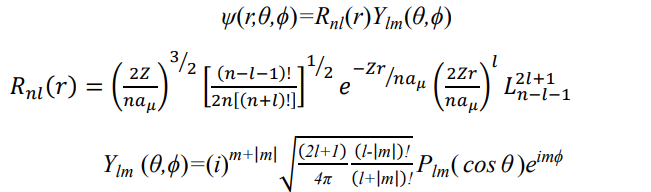

Enter Zm: Note that Zm should > 0 
5
Enter n: Note that n should > 0 
3
Enter l: Note that l should in [0,n-1] 
2
Enter m: Note that m should in [-l,l] 
1


No handles with labels found to put in legend.


Now,we at the x-z plane


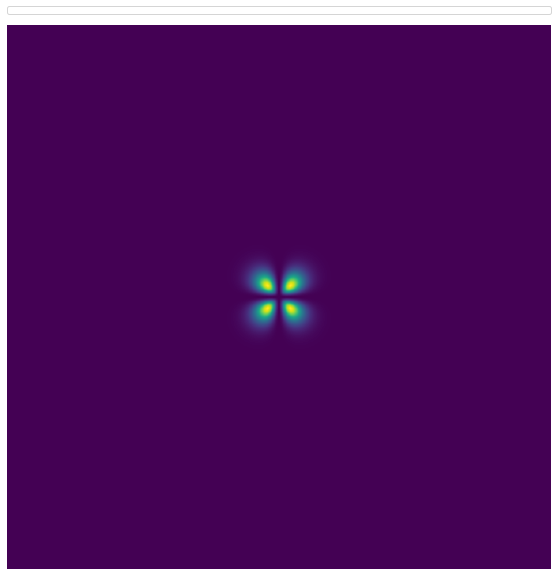

In [6]:
#### set the quantum numbers
Zm = float(input("Enter Zm: Note that Zm should > 0 \n"))
n = float(input("Enter n: Note that n should > 0 \n"))
l = float(input("Enter l: Note that l should in [0,n-1] \n"))
m = float(input("Enter m: Note that m should in [-l,l] \n"))


half_dpi = 200
x = np.linspace(-20, 20, 2*half_dpi)
y = 0  #### the plane locates at y = 0 
z = np.linspace(-20, 20, 2*half_dpi)
X, Z = np.meshgrid(x, z)
rho = np.linalg.norm((X,y,Z), axis=0)*Zm  / n
Lag = assoc_laguerre(2 * rho, n - l - 1, 2 * l + 1)
Ylm  = sph_harm(m, l, np.arctan2(y,X), np.arctan2(np.linalg.norm((X,y), axis=0), Z))
Psi = np.exp(-rho) * np.power((2*rho),l) * Lag * Ylm
density = np.conjugate(Psi) * Psi
density = density.real



#### visualization
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(density.real, extent=[-density.max()*0.1,density.max()*0.1,  
                                -density.max()*0.1,density.max()*0.1])


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=3, mode="expand", borderaxespad=0.)
plt.xticks([])  
plt.yticks([])  
plt.axis('off') 
#plt.savefig("./Zmnlm4321.png",dpi=400,bbox_inches="tight")
print("Now,we at the x-z plane")
plt.show()

### Observe the distribution of electrons along the x-axis

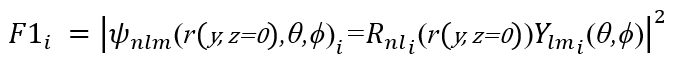

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


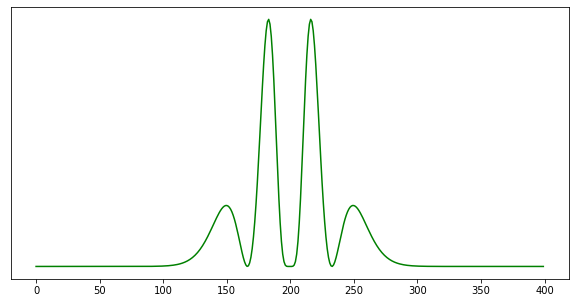

In [2]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(density[half_dpi,:],color='green')
#plt.xticks(x,("1","2"))  
plt.yticks([])  
#plt.axis('off')  
fig.patch.set_alpha(0.0)
plt.savefig("./testx.png",dpi=400,bbox_inches="tight")

### Observe the distribution of electrons along the z-axis

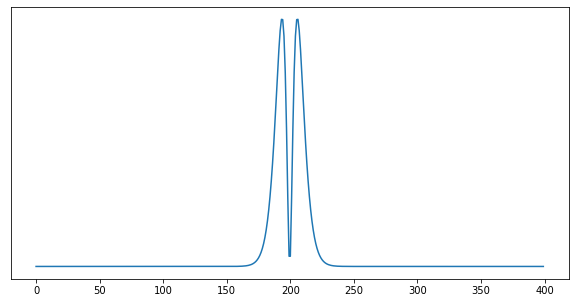

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(density[:,half_dpi])
#plt.xticks([]) 
plt.yticks([])  
#plt.axis('off')  
fig.patch.set_alpha(0.0)
plt.savefig("./testz.png",dpi=400,bbox_inches="tight")

In [15]:
r = 1.65
dpi_r = int(100*r)
print(density[half_dpi,half_dpi+dpi_r])
print(density[half_dpi,half_dpi-dpi_r])

4.881077161225785e-23
6.73563370648085e-23
4.88107716125403e-23
6.735633706516541e-23


In [16]:
"""

Obtain the electron probability function in different orientations of each configuration of electrons

"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from scipy.special import assoc_laguerre

def get_wave_r1(n,l,m,r,Zm):
        x = r
        y = 0 
        z = 0
        X, Z = np.meshgrid(x, z)

        rho = np.linalg.norm((X,y,Z), axis=0) *Zm / n
        Lag = assoc_laguerre(2 * rho, n - l - 1, 2 * l + 1)
        Ylm  = sph_harm(m, l, np.arctan2(y,X), np.arctan2(np.linalg.norm((X,y), axis=0), Z))
        Psi = np.exp(-rho) * np.power((2*rho),l) * Lag * Ylm

        density = np.conjugate(Psi) * Psi
        density = density.real
        return density[0]
    
def get_wave_r2(n,l,m,r,Zm):
        x = 0
        y = 0
        z = r
        X, Z = np.meshgrid(x, z)

        rho = np.linalg.norm((X,y,Z), axis=0)*Zm  / n
        Lag = assoc_laguerre(2 * rho, n - l - 1, 2 * l + 1)
        Ylm  = sph_harm(m, l, np.arctan2(y,X), np.arctan2(np.linalg.norm((X,y), axis=0), Z))
        Psi = np.exp(-rho) * np.power((2*rho),l) * Lag * Ylm

        density = np.conjugate(Psi) * Psi
        density = density.real
        return density[0]
    
def get_wave_r3(n,l,m,r,Zm):
        x = 2**0.5*r/2
        y = 0
        z = 2**0.5*r/2
        X, Z = np.meshgrid(x, z)

        rho = np.linalg.norm((X,y,Z), axis=0)*Zm  / n
        Lag = assoc_laguerre(2 * rho, n - l - 1, 2 * l + 1)
        Ylm  = sph_harm(m, l, np.arctan2(y,X), np.arctan2(np.linalg.norm((X,y), axis=0), Z))
        Psi = np.exp(-rho) * np.power((2*rho),l) * Lag * Ylm

        density = np.conjugate(Psi) * Psi
        density = density.real
        return density[0]
        
def get_wave_mean(n,l,m,r,Zm):
    n = n
    l = l
    m = m
    Zm = Zm
    wave1 = get_wave_r1(n,l,m,r,Zm)        
    wave2 = get_wave_r2(n,l,m,r,Zm)
    wave3 = get_wave_r3(n,l,m,r,Zm)
    mean_wave = (wave1+ wave2 + wave3 )/ 3
    return mean_wave            ###################here to control whether to output three directions or just average

####  Extract features of mp-984703 as an example

In [42]:
tem_path = "/public/home/tianhaosu/My_work/GGN/data_get/cif2POSCAR/all_cif/all_cif/" + "mp-984703" + ".cif.vasp"
get = feature_extraction(tem_path)  ## get cif-vasp file
get.read_poscar()  ## get str information
get.real_direction()  ## get dv to project point
print(get.overlap_avg)  ## Calculate the avg-electrons in all configurations and get the characteristic value of 12 hkpt

[0.7957747154808467, 8.618556712640915e-05, 3.0792898553733086e-07, 4.2171851428520214e-07, 0.0, 0.0, 0.0, 3.073113466568524e-07, 0.0, 0.0, 0.0, 0.0]


/public/home/tianhaosu/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [43]:
print(get.overlap)  ## the 

[4.77464829288508, 0.0005171134027584549, 1.8475739132239852e-06, 2.530311085711213e-06, 0, 0, 0, 1.8438680799411144e-06, 0, 0, 0, 0]


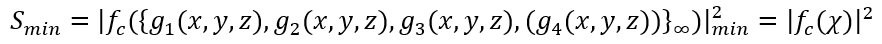

In [6]:
less hkpts.txt

###  Here, you can add more k points or high symmetric point connections to the EPW

# Thanks

## thsu0407@gmail.com